In [1]:
from scipy import stats
import matplotlib as mpl
from matplotlib import pyplot as plt

from plotting import *
from datasets import load_y2h_pairwise_test

In [2]:
mpl.rcParams['font.size'] = 7.
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['savefig.dpi'] = 500


In [3]:
sources_to_show_homodimer = ['Lit-BM-17', 'I3D-exp-17', 'Ito-core', 'Uetz-screen', 'CCSB-YI1']
y2h = load_y2h_pairwise_test(remove_homodimers=False)
y2h = y2h.loc[(y2h['orf_name_a'] != y2h['orf_name_b']) | y2h['source_dataset'].isin(sources_to_show_homodimer), :]
for s in sources_to_show_homodimer:
    y2h.loc[(y2h['orf_name_a'] == y2h['orf_name_b']) & (y2h['source_dataset'] == s), 'source_dataset'] = s + '_homodimer'

y2h_alt = y2h.copy()
y2h_alt.loc[y2h_alt['source_dataset'].isin({'Uetz-screen', 'Ito-core', 'CCSB-YI1'}), 'source_dataset'] = 'Y2H-union'
y2h_alt.loc[y2h_alt['source_dataset'].isin({'Uetz-screen_homodimer', 'Ito-core_homodimer', 'YI1_homodimer'}), 'source_dataset'] = 'Y2H-union_homodimer'
y2h_alt = y2h_alt.drop_duplicates(['pair', 'source_dataset'])

In [4]:
y2h_alt.loc[y2h_alt['source_dataset'].isin(['I3D-exp-17', 'Lit-BM-17', 'Y2H-union']),
            'pair'].nunique()

6106

In [5]:
colors = {'': '',
          'Uetz-screen': COLOR_Y2H,
          'Ito-core': COLOR_Y2H,
          'CCSB-YI1': COLOR_Y2H,
          'Y2H-union': COLOR_Y2H,
          'Tarassov': COLOR_Y2H,
          'Lit-NB-17': COLOR_LIT_NB,
          'CYC2008': COLOR_LIT_NB,
          'Lit-BS-17': COLOR_LIT,
          'Lit-BM-17': COLOR_LIT,
          'I3D-exp-17': COLOR_I3D,
          'Gavin_2002': COLOR_SYS_NB,
          'Gavin_2006': COLOR_SYS_NB,
          'Krogan': COLOR_SYS_NB,
          'Ho': COLOR_SYS_NB,
          'scRRS-v2': COLOR_RRS,
          'scPRS-v2': COLOR_PRS,
          'Lit-BM-13': COLOR_LIT,
          'Lit-BS-13': COLOR_LIT,
          'PrePPI-LR600': COLOR_PREDICT,
          'Jansen': COLOR_PREDICT,
          'GI_PSN_PCC_gt_0.2': COLOR_GI_PSN,
          'GI_PSN_PCC_gt_0.3': COLOR_GI_PSN,
          'GI_PSN_PCC_gt_0.5': COLOR_GI_PSN,
          'AlphaFold+RoseTTAFold': COLOR_ALPHAFOLD_ROSETTAFOLD}
display_names = {'': '',
                 'Uetz-screen': 'Uetz-screen',              
                 'Ito-core': 'Ito-core',
                 'CCSB-YI1': 'CCSB-YI1',
                 'YI2': 'CCSB-YI2',
                 'Y2H-union': 'Y2H-union',
                 'Tarassov': 'Tarassov',        
                 'scRRS-v2': 'scRRS-v2',
                 'scPRS-v2': 'scPRS-v2',
                 'Lit-NB-17': 'Lit-NB-17',
                 'Lit-BS-17': 'Lit-BS-17',
                 'Lit-BM-17': 'Lit-BM-17',
                 'LIT_BM': 'Lit-BM-17',
                 'I3D-exp-17': 'I3D-exp-17',
                 'Gavin_2002': 'Gavin (a)',
                 'Gavin_2006': 'Gavin (b)',
                 'Krogan': 'Krogan',
                 'Ho': 'Ho',
                 'CYC2008': 'CYC2008',
                 'PrePPI-LR600': 'PrePPI',
                 'Jansen': 'Jansen',
                 'GI_PSN_PCC_gt_0.2': '0.2',
                 'GI_PSN_PCC_gt_0.3': '0.3',
                 'GI_PSN_PCC_gt_0.5': '0.5',
                  'AlphaFold+RoseTTAFold':  'AlphaFold+\nRoseTTAFold'}
display_names = {**display_names, **{k + '_homodimer': v + ' homodimers' for k, v in display_names.items()}}
colors = {**colors, **{k + '_homodimer': v for k, v in colors.items()}}


def plot_pairwise_results(data, categories, ymax=1., ax=None, color=None, category_column='source_dataset', draw_numbers=False):
    df = data.copy()
    rows = [df[category_column] == s for s in categories]
    if ax is None:
        ax = plt.gca()
    validation_plot(data=df,
                         selections=rows,
                         labels=[display_names.get(c, c) for c in categories],
                         y_max=ymax,
                         draw_numbers=draw_numbers,
                         xlabel_rotation=90,
                         ax=ax,
                         colors=color,
                         errorbar_capsize=0.5,
                         errorbar_thickness=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_tick_params(length=0)
    ax.set_facecolor('white')
    ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])

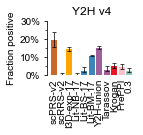

In [6]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(w=1.6, h=1)

cats = ['scPRS-v2',
        'scRRS-v2',
        'I3D-exp-17',
        'Lit-NB-17',
        'Lit-BS-17',
        'Lit-BM-17',
        'Y2H-union',
        'Tarassov',
         'Krogan',
        'PrePPI-LR600',
        'GI_PSN_PCC_gt_0.3',
        ]
plot_pairwise_results(y2h_alt, 
                      cats, 
                      ymax=0.3,
                      ax=ax,
                      color=[colors[c] for c in cats])
ax.set_title('Y2H v4')
savefig('Y2H-S07_reduced-main-categories_bar-plot')

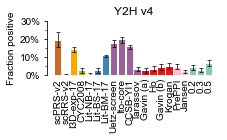

In [7]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(w=3.1, h=1)

cats = ['scPRS-v2',
        'scRRS-v2',
        'I3D-exp-17',
        'CYC2008',
        'Lit-NB-17',
        'Lit-BS-17',
        'Lit-BM-17',
        'Uetz-screen',
        'Ito-core',
        'CCSB-YI1',
        'Tarassov',
        'Gavin_2002',
         'Ho',
         'Gavin_2006',
         'Krogan',
        'PrePPI-LR600',
        'Jansen',
        'GI_PSN_PCC_gt_0.2',
        'GI_PSN_PCC_gt_0.3',
        'GI_PSN_PCC_gt_0.5'
        ]
plot_pairwise_results(y2h, 
                      cats, 
                      ymax=0.3,
                      ax=ax,
                      color=[colors[c] for c in cats])
ax.set_title('Y2H v4')
savefig('Y2H-S07_all-categories_Y2H-union-split_no-homodimers_bar-plot')

In [8]:
def calc_p_value(source_a, source_b):
    pos_a = (y2h_alt.loc[y2h_alt['source_dataset'] == source_a, 'result'] == True).sum()
    neg_a = (y2h_alt.loc[y2h_alt['source_dataset'] == source_a, 'result'] == False).sum()
    pos_b = (y2h_alt.loc[y2h_alt['source_dataset'] == source_b, 'result'] == True).sum()
    neg_b = (y2h_alt.loc[y2h_alt['source_dataset'] == source_b, 'result'] == False).sum()
    print()
    print('{} {}/{} ({:.1f}%)'.format(source_a, pos_a, pos_a + neg_a, (pos_a / (pos_a + neg_a)) * 100))
    print('{} {}/{} ({:.1f}%)'.format(source_b, pos_b, pos_b + neg_b, (pos_b / (pos_b + neg_b)) * 100))
    
    if source_a == 'scPRS-v2' or source_b == 'scRRS-v2':
        alternative = 'less'
    elif source_b == 'scPRS-v2' or source_a == 'scRRS-v2':
        alternative = 'greater'
    else:
        alternative = 'two-sided'
    print('odds: {:.2f}, P = {:.2E}'.format(*stats.fisher_exact([[neg_a, pos_a], [neg_b, pos_b]], 
                                                      alternative=alternative)))
    print()
    
    
calc_p_value('scPRS-v2', 'Y2H-union')
calc_p_value('scPRS-v2', 'I3D-exp-17')
calc_p_value('scPRS-v2', 'Lit-BM-17')
calc_p_value('Y2H-union', 'I3D-exp-17')
calc_p_value('Y2H-union', 'Lit-BM-17')
calc_p_value('Lit-BM-17', 'I3D-exp-17')
calc_p_value('scRRS-v2', 'Tarassov')
calc_p_value('scRRS-v2', 'Gavin_2002')
calc_p_value('scRRS-v2', 'Gavin_2006')
calc_p_value('scRRS-v2', 'Ho')
calc_p_value('scRRS-v2', 'Krogan')
calc_p_value('scRRS-v2', 'CYC2008')
calc_p_value('scPRS-v2', 'Gavin_2002')
calc_p_value('scPRS-v2', 'Gavin_2006')
calc_p_value('scPRS-v2', 'Ho')
calc_p_value('scPRS-v2', 'Krogan')


scPRS-v2 18/94 (19.1%)
Y2H-union 300/1987 (15.1%)
odds: 0.75, P = 1.77E-01


scPRS-v2 18/94 (19.1%)
I3D-exp-17 112/787 (14.2%)
odds: 0.70, P = 1.33E-01


scPRS-v2 18/94 (19.1%)
Lit-BM-17 373/3472 (10.7%)
odds: 0.51, P = 1.20E-02


Y2H-union 300/1987 (15.1%)
I3D-exp-17 112/787 (14.2%)
odds: 0.93, P = 5.94E-01


Y2H-union 300/1987 (15.1%)
Lit-BM-17 373/3472 (10.7%)
odds: 0.68, P = 3.65E-06


Lit-BM-17 373/3472 (10.7%)
I3D-exp-17 112/787 (14.2%)
odds: 1.38, P = 6.25E-03


scRRS-v2 0/184 (0.0%)
Tarassov 5/172 (2.9%)
odds: inf, P = 2.55E-02


scRRS-v2 0/184 (0.0%)
Gavin_2002 4/187 (2.1%)
odds: inf, P = 6.35E-02


scRRS-v2 0/184 (0.0%)
Gavin_2006 8/191 (4.2%)
odds: inf, P = 4.21E-03


scRRS-v2 0/184 (0.0%)
Ho 6/194 (3.1%)
odds: inf, P = 1.76E-02


scRRS-v2 0/184 (0.0%)
Krogan 9/188 (4.8%)
odds: inf, P = 1.95E-03


scRRS-v2 0/184 (0.0%)
CYC2008 4/188 (2.1%)
odds: inf, P = 6.42E-02


scPRS-v2 18/94 (19.1%)
Gavin_2002 4/187 (2.1%)
odds: 0.09, P = 1.71E-06


scPRS-v2 18/94 (19.1%)
Gavin_2006 8/